In [1]:
# Initial imports
from alpaca_trade_api.rest import REST, TimeFrame
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
from datetime import date
load_dotenv()
import requests
import pandas as pd
import numpy as np
import getpass
import os

In [2]:
from SOBacktester import SOBacktester as SO

In [3]:
# API Info for fetching data, portfolio, etc. from Alpaca
BASE_URL = "https://paper-api.alpaca.markets"

if os.getenv("APCA_API_KEY_ID") is not None:
    ALPACA_API_KEY = os.getenv("APCA_API_KEY_ID")
else:

    ALPACA_API_KEY = getpass.getpass('Type your alpaca api key here, it is safe from viewing.')

if os.getenv("ALPACA_SECRET_KEY") is not None:
    ALPACA_SECRET_KEY = os.getenv("ALPACA_SECRET_KEY")
else:

    ALPACA_SECRET_KEY = getpass.getpass('Type your secret alpaca api key here, it is safe from viewing.')

# Instantiate REST API Connection - Account
api_account = tradeapi.REST(key_id=ALPACA_API_KEY, secret_key=ALPACA_SECRET_KEY, raw_data=True,base_url=BASE_URL, api_version='v2')

# Instantiate REST API Connection - Trade
api_trade = tradeapi.REST(key_id=ALPACA_API_KEY, secret_key=ALPACA_SECRET_KEY, raw_data=False, base_url=BASE_URL, api_version='v2')

In [4]:
# Choose a symbol
symbol = 'BTCUSD'

# time window in days for rolling low/high
periods = 14

# time window in days for %D line
d_mw = 3

# Get the start date and end dates
start = "2009-01-03" # Bitcoin's genesis block date
end = "2022-03-16"

# Proportional Trade cost per trade
tc = 0.000000

In [5]:
tester = SO(symbol, periods, d_mw, start, end, tc,api_trade)

In [6]:
tester

SOBacktester(symbol = BTCUSD, periods = 14, D_mw = 3, start = 2009-01-03, end = 2022-03-16, api = <alpaca_trade_api.rest.REST object at 0x000002AF99DE0308>)

In [7]:
tester.test_strategy()

(3.921138, -146.779641)

In [8]:
tester.results

,exchange,open,high,low,close,volume,trade_count,vwap,returns,roll_low,roll_high,K,D,position,strategy,trades,creturns,cstrategy
timestamp,,,,,,,,,,,,,,,,,,
2015-01-27 06:00:00+00:00,CBSE,263.96,265.99,253.53,257.89,538.920802,1083,260.189957,-0.062345,109.87,322.72,69.541931,77.150608,-1,-0.062345,0.0,0.939558,0.939558
2015-01-28 06:00:00+00:00,CBSE,257.90,262.00,228.50,236.09,4800.863335,6244,244.627508,-0.088320,109.87,322.72,59.299977,68.726020,-1,0.088320,0.0,0.860136,1.026315
2015-01-29 06:00:00+00:00,CBSE,232.62,240.00,221.14,235.03,5033.534735,6091,232.060766,-0.004500,184.00,322.72,36.786332,55.209413,-1,0.004500,0.0,0.856274,1.030944
2015-01-30 06:00:00+00:00,CBSE,242.26,244.59,227.89,229.07,4709.384670,5008,232.924199,-0.025686,184.00,322.72,32.489908,42.858739,-1,0.025686,0.0,0.834560,1.057767
2015-01-31 06:00:00+00:00,CBSE,218.67,220.73,216.16,218.15,1491.309920,2961,218.655542,-0.048845,184.00,322.72,24.617935,31.298058,-1,0.048845,0.0,0.794776,1.110716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-12 06:00:00+00:00,CBSE,39176.21,39472.17,38682.66,39128.83,5191.800482,296085,39087.373020,-0.001259,37020.00,45426.45,25.085857,23.913106,1,0.001259,2.0,142.556215,3.824644
2022-03-13 06:00:00+00:00,CBSE,39128.72,39197.64,37560.40,38535.33,9746.146402,410824,38410.908158,-0.015284,37161.88,45426.45,16.618529,22.458820,-1,-0.015284,2.0,140.393945,3.766632
2022-03-14 05:00:00+00:00,CBSE,38532.33,39906.39,38413.87,38794.04,14030.813097,520849,38974.602336,0.006691,37161.88,45426.45,19.748880,20.484422,-1,-0.006691,0.0,141.336491,3.741513


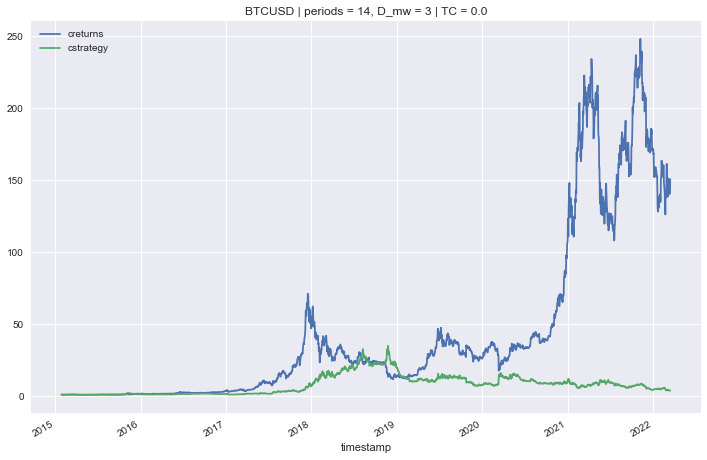

In [9]:
tester.plot_results()

In [10]:
tester.results.trades.value_counts()

0.0    1539
2.0    1067
Name: trades, dtype: int64

In [11]:
tester.optimize_parameters((10, 100, 1), (3, 50, 1))

(array([94., 14.]), 921.986487)

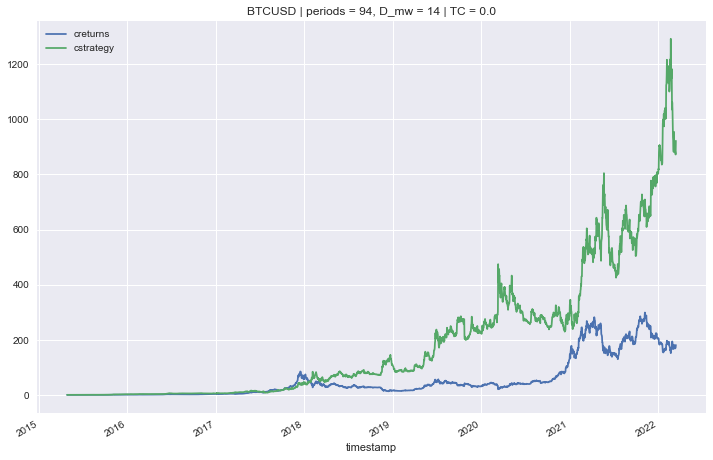

In [12]:
tester.plot_results()

In [13]:
tester.results.trades.value_counts()

0.0    2140
2.0     375
Name: trades, dtype: int64